# Comparison of Normal Mixture Distributions

This notebook compares the normal variance-mean mixture distributions:

| Distribution | Mixing Distribution | Tail Behavior |
|-------------|---------------------|---------------|
| **Generalized Hyperbolic (GH)** | $Y \sim \text{GIG}(p, a, b)$ | Most general |
| Variance Gamma (VG) | $Y \sim \text{Gamma}(\alpha, \beta)$ | Semi-heavy |
| Normal Inverse Gamma (NInvG) | $Y \sim \text{InvGamma}(\alpha, \beta)$ | Heavy (Student-t like) |
| Normal Inverse Gaussian (NIG) | $Y \sim \text{InvGauss}(\delta, \eta)$ | Semi-heavy |

We also compare with the **Normal** and **Student-t** distributions.

**Key insight:** VG, NInvG, and NIG are all **special cases** of the Generalized Hyperbolic distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from normix.distributions.mixtures import (
    GeneralizedHyperbolic,
    VarianceGamma,
    NormalInverseGamma,
    NormalInverseGaussian
)

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

np.set_printoptions(precision=4, suppress=True)

## 1. Symmetric Distributions (γ = 0)

When $\gamma = 0$, all mixture distributions are symmetric. We match them to have similar variance.

In [2]:
# Create symmetric distributions with similar variance

# VG: Var[X] = (α/β) σ² when γ=0, so for α=2, β=1, σ²=1, Var=2
vg_sym = VarianceGamma.from_classical_params(
    mu=np.array([0.0]),
    gamma=np.array([0.0]),
    sigma=np.array([[1.0]]),
    shape=2.0,
    rate=1.0
)

# NInvG: Var[X] = (β/(α-1)) σ² when γ=0 and α>2
# For α=3, β=2, σ²=1, Var = (2/2)*1 = 1, but let's match VG variance
ninvg_sym = NormalInverseGamma.from_classical_params(
    mu=np.array([0.0]),
    gamma=np.array([0.0]),
    sigma=np.array([[1.0]]),
    shape=3.0,
    rate=1.0
)

# NIG: Var[X] = δ σ² when γ=0
nig_sym = NormalInverseGaussian.from_classical_params(
    mu=np.array([0.0]),
    gamma=np.array([0.0]),
    sigma=np.array([[1.0]]),
    delta=1.0,
    eta=1.0
)

print("Symmetric Distributions")
print("="*50)
print(f"VG:    mean = {vg_sym.mean()[0]:.4f}, var = {vg_sym.var()[0]:.4f}")
print(f"NInvG: mean = {ninvg_sym.mean()[0]:.4f}, var = {ninvg_sym.var()[0]:.4f}")
print(f"NIG:   mean = {nig_sym.mean()[0]:.4f}, var = {nig_sym.var()[0]:.4f}")

Symmetric Distributions
VG:    mean = 0.0000, var = 2.0000
NInvG: mean = 0.0000, var = 0.5000
NIG:   mean = 0.0000, var = 1.0000


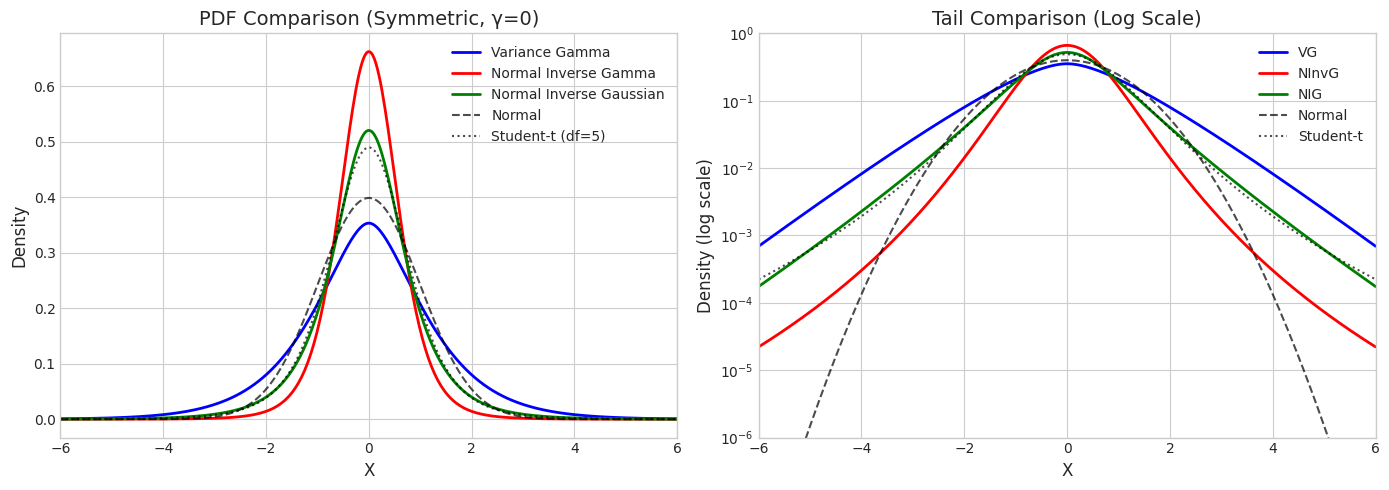

In [3]:
# PDF comparison
x_range = np.linspace(-6, 6, 400)

vg_pdf = vg_sym.pdf(x_range.reshape(-1, 1)).flatten()
ninvg_pdf = ninvg_sym.pdf(x_range.reshape(-1, 1)).flatten()
nig_pdf = nig_sym.pdf(x_range.reshape(-1, 1)).flatten()

# Match variance for Normal and Student-t
var_ref = 1.0  # Use unit variance for comparison
normal_pdf = stats.norm(0, np.sqrt(var_ref)).pdf(x_range)
t_pdf = stats.t(df=5, scale=np.sqrt(var_ref * 3/5)).pdf(x_range)  # df=5, scaled for same variance

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear scale
axes[0].plot(x_range, vg_pdf, 'b-', linewidth=2, label='Variance Gamma')
axes[0].plot(x_range, ninvg_pdf, 'r-', linewidth=2, label='Normal Inverse Gamma')
axes[0].plot(x_range, nig_pdf, 'g-', linewidth=2, label='Normal Inverse Gaussian')
axes[0].plot(x_range, normal_pdf, 'k--', linewidth=1.5, alpha=0.7, label='Normal')
axes[0].plot(x_range, t_pdf, 'k:', linewidth=1.5, alpha=0.7, label='Student-t (df=5)')
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('PDF Comparison (Symmetric, γ=0)', fontsize=14)
axes[0].legend()
axes[0].set_xlim(-6, 6)

# Log scale for tail comparison
axes[1].semilogy(x_range, vg_pdf, 'b-', linewidth=2, label='VG')
axes[1].semilogy(x_range, ninvg_pdf, 'r-', linewidth=2, label='NInvG')
axes[1].semilogy(x_range, nig_pdf, 'g-', linewidth=2, label='NIG')
axes[1].semilogy(x_range, normal_pdf, 'k--', linewidth=1.5, alpha=0.7, label='Normal')
axes[1].semilogy(x_range, t_pdf, 'k:', linewidth=1.5, alpha=0.7, label='Student-t')
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('Density (log scale)', fontsize=12)
axes[1].set_title('Tail Comparison (Log Scale)', fontsize=14)
axes[1].legend()
axes[1].set_xlim(-6, 6)
axes[1].set_ylim(1e-6, 1)

plt.tight_layout()
plt.show()

## 2. Skewed Distributions (γ ≠ 0)

When $\gamma \neq 0$, the distributions become asymmetric.

In [4]:
# Create right-skewed distributions
gamma_val = 0.5

vg_skew = VarianceGamma.from_classical_params(
    mu=np.array([0.0]),
    gamma=np.array([gamma_val]),
    sigma=np.array([[1.0]]),
    shape=2.0,
    rate=1.0
)

ninvg_skew = NormalInverseGamma.from_classical_params(
    mu=np.array([0.0]),
    gamma=np.array([gamma_val]),
    sigma=np.array([[1.0]]),
    shape=3.0,
    rate=1.0
)

nig_skew = NormalInverseGaussian.from_classical_params(
    mu=np.array([0.0]),
    gamma=np.array([gamma_val]),
    sigma=np.array([[1.0]]),
    delta=1.0,
    eta=1.0
)

print(f"Right-Skewed Distributions (γ = {gamma_val})")
print("="*50)
print(f"VG:    mean = {vg_skew.mean()[0]:.4f}, var = {vg_skew.var()[0]:.4f}")
print(f"NInvG: mean = {ninvg_skew.mean()[0]:.4f}, var = {ninvg_skew.var()[0]:.4f}")
print(f"NIG:   mean = {nig_skew.mean()[0]:.4f}, var = {nig_skew.var()[0]:.4f}")

Right-Skewed Distributions (γ = 0.5)
VG:    mean = 1.0000, var = 2.5000
NInvG: mean = 0.2500, var = 0.5625
NIG:   mean = 0.5000, var = 1.2500


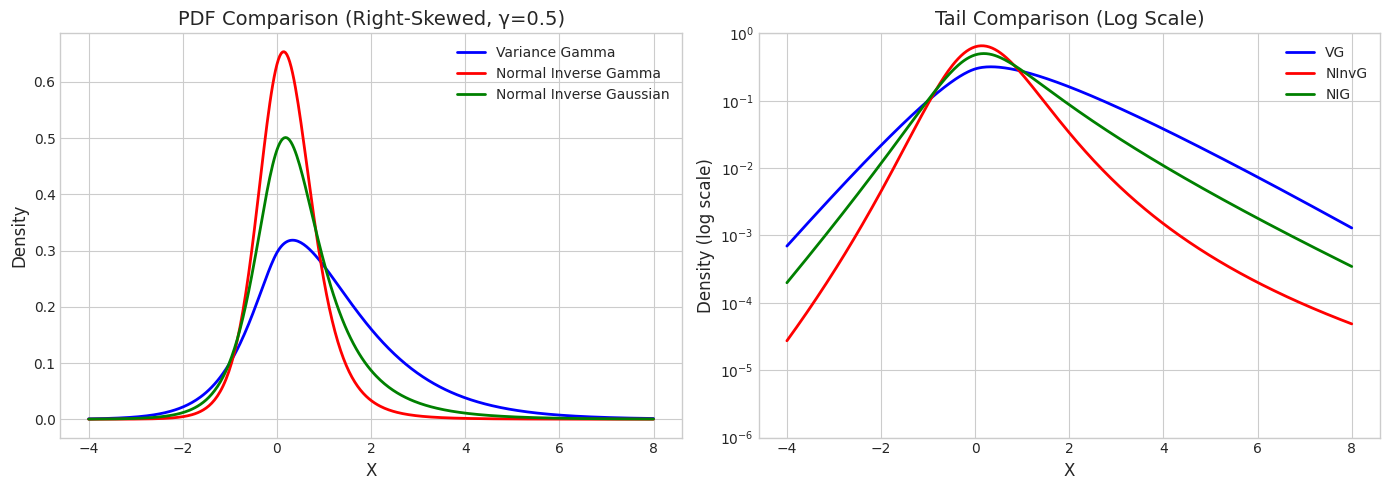

In [5]:
# PDF comparison - skewed
x_range = np.linspace(-4, 8, 400)

vg_pdf = vg_skew.pdf(x_range.reshape(-1, 1)).flatten()
ninvg_pdf = ninvg_skew.pdf(x_range.reshape(-1, 1)).flatten()
nig_pdf = nig_skew.pdf(x_range.reshape(-1, 1)).flatten()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear scale
axes[0].plot(x_range, vg_pdf, 'b-', linewidth=2, label='Variance Gamma')
axes[0].plot(x_range, ninvg_pdf, 'r-', linewidth=2, label='Normal Inverse Gamma')
axes[0].plot(x_range, nig_pdf, 'g-', linewidth=2, label='Normal Inverse Gaussian')
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title(f'PDF Comparison (Right-Skewed, γ={gamma_val})', fontsize=14)
axes[0].legend()

# Log scale for tail comparison
axes[1].semilogy(x_range, vg_pdf, 'b-', linewidth=2, label='VG')
axes[1].semilogy(x_range, ninvg_pdf, 'r-', linewidth=2, label='NInvG')
axes[1].semilogy(x_range, nig_pdf, 'g-', linewidth=2, label='NIG')
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('Density (log scale)', fontsize=12)
axes[1].set_title('Tail Comparison (Log Scale)', fontsize=14)
axes[1].legend()
axes[1].set_ylim(1e-6, 1)

plt.tight_layout()
plt.show()

## 3. Sample Statistics Comparison

In [6]:
# Generate samples and compute statistics
n_samples = 100000

vg_samples = vg_sym.rvs(size=n_samples, random_state=42).flatten()
ninvg_samples = ninvg_sym.rvs(size=n_samples, random_state=42).flatten()
nig_samples = nig_sym.rvs(size=n_samples, random_state=42).flatten()
normal_samples = stats.norm(0, 1).rvs(size=n_samples, random_state=42)

print("Sample Statistics (Symmetric Distributions)")
print("="*70)
print(f"{'Distribution':<15} {'Mean':>10} {'Std':>10} {'Skewness':>12} {'Kurtosis':>12}")
print("-"*70)

for name, samples in [('VG', vg_samples), ('NInvG', ninvg_samples), 
                       ('NIG', nig_samples), ('Normal', normal_samples)]:
    print(f"{name:<15} {np.mean(samples):>10.4f} {np.std(samples):>10.4f} "
          f"{stats.skew(samples):>12.4f} {stats.kurtosis(samples):>12.4f}")

Sample Statistics (Symmetric Distributions)
Distribution          Mean        Std     Skewness     Kurtosis
----------------------------------------------------------------------
VG                  0.0036     1.4115      -0.0003       1.5262
NInvG               0.0011     0.7070      -0.0416       2.5453
NIG                 0.0023     0.9982       0.0319       2.9578
Normal              0.0010     1.0009      -0.0018      -0.0080


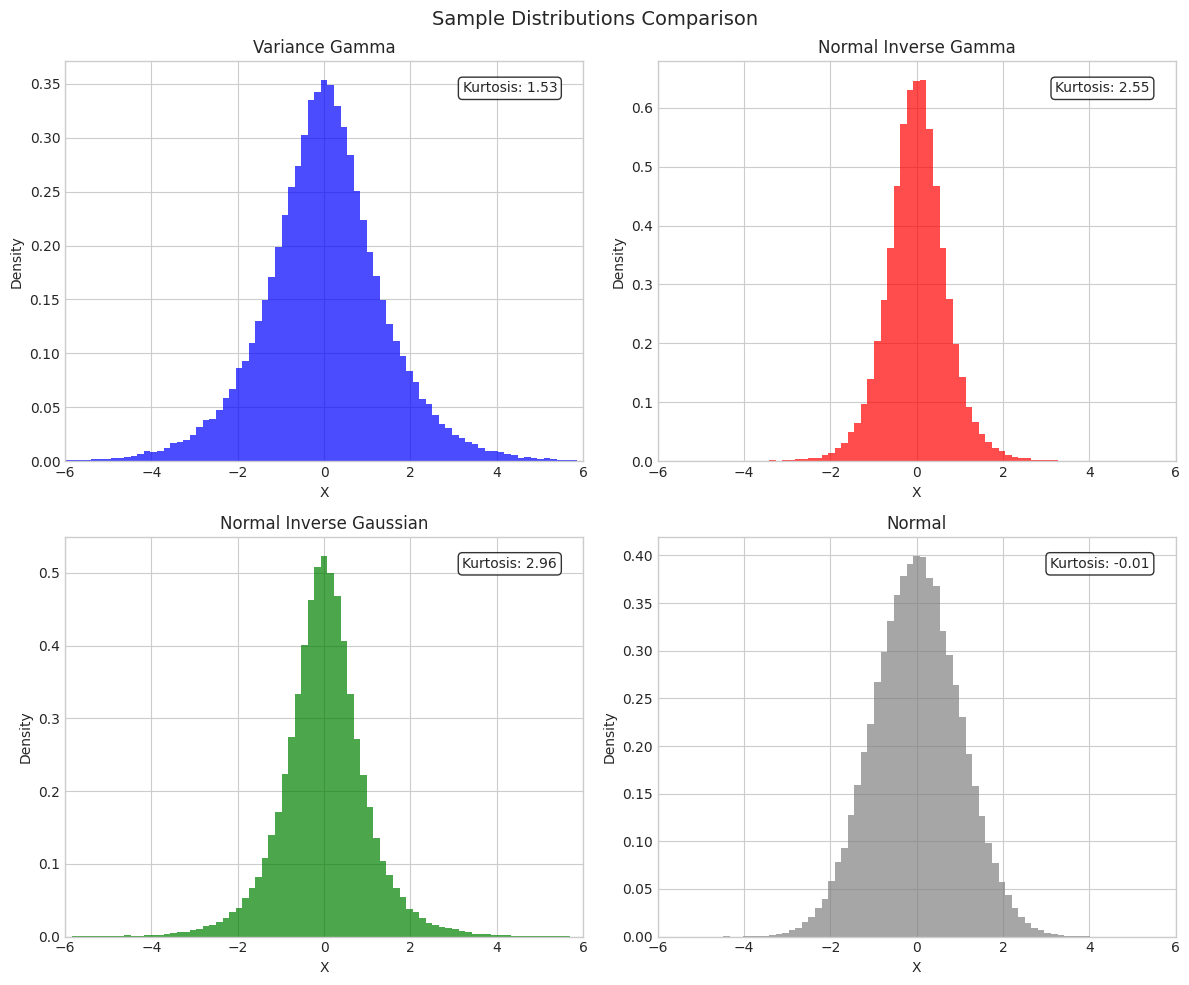

In [7]:
# Histogram comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

bins = np.linspace(-6, 6, 80)

for ax, (name, samples, color) in zip(axes.flat, 
    [('Variance Gamma', vg_samples, 'blue'),
     ('Normal Inverse Gamma', ninvg_samples, 'red'),
     ('Normal Inverse Gaussian', nig_samples, 'green'),
     ('Normal', normal_samples, 'gray')]):
    
    ax.hist(samples, bins=bins, density=True, alpha=0.7, color=color, label='Samples')
    ax.set_title(name, fontsize=12)
    ax.set_xlabel('X')
    ax.set_ylabel('Density')
    ax.set_xlim(-6, 6)
    
    # Add kurtosis annotation
    kurt = stats.kurtosis(samples)
    ax.annotate(f'Kurtosis: {kurt:.2f}', xy=(0.95, 0.95), xycoords='axes fraction',
                ha='right', va='top', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Sample Distributions Comparison', fontsize=14)
plt.tight_layout()
plt.show()

## 4. Tail Behavior Analysis

Analyzing the probability of extreme events (tail probabilities).

In [8]:
# Compute tail probabilities P(|X| > t) for various thresholds
thresholds = [2, 3, 4, 5]

print("Tail Probabilities P(|X| > t)")
print("="*70)
print(f"{'t':>6} {'VG':>12} {'NInvG':>12} {'NIG':>12} {'Normal':>12} {'Student-t':>12}")
print("-"*70)

normal_dist = stats.norm(0, 1)
t_dist = stats.t(df=5, scale=np.sqrt(3/5))  # Scaled to have similar variance

for t in thresholds:
    vg_tail = np.mean(np.abs(vg_samples) > t)
    ninvg_tail = np.mean(np.abs(ninvg_samples) > t)
    nig_tail = np.mean(np.abs(nig_samples) > t)
    normal_tail = 2 * normal_dist.sf(t)
    t_tail = 2 * t_dist.sf(t)
    
    print(f"{t:>6} {vg_tail:>12.6f} {ninvg_tail:>12.6f} {nig_tail:>12.6f} "
          f"{normal_tail:>12.6f} {t_tail:>12.6f}")

Tail Probabilities P(|X| > t)
     t           VG        NInvG          NIG       Normal    Student-t
----------------------------------------------------------------------
     2     0.141580     0.013090     0.054240     0.045500     0.049313
     3     0.044780     0.002020     0.013660     0.002700     0.011725
     4     0.013710     0.000390     0.003590     0.000063     0.003573
     5     0.003900     0.000080     0.000800     0.000001     0.001328


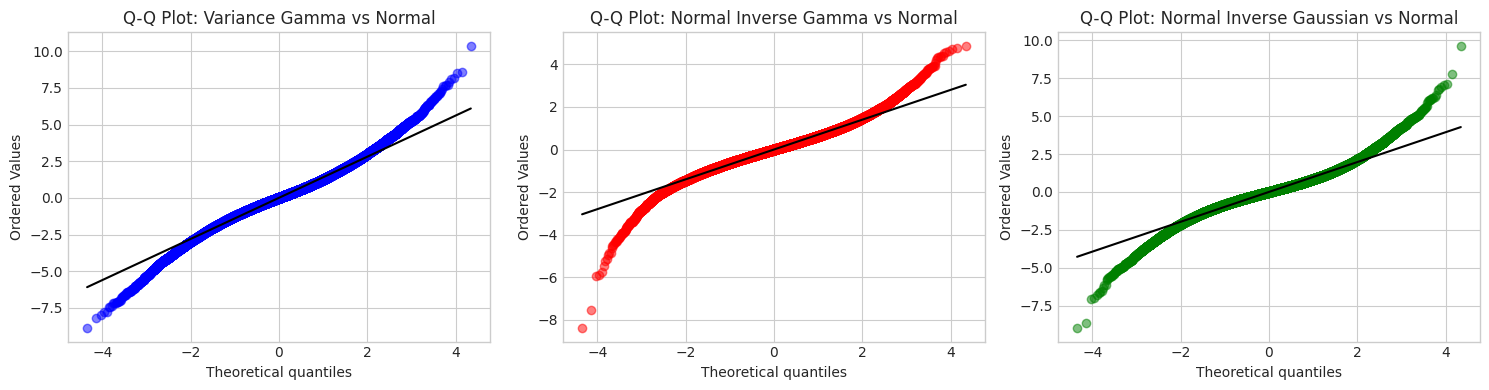

In [9]:
# Q-Q plots against Normal
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, samples, color) in zip(axes, 
    [('Variance Gamma', vg_samples, 'blue'),
     ('Normal Inverse Gamma', ninvg_samples, 'red'),
     ('Normal Inverse Gaussian', nig_samples, 'green')]):
    
    stats.probplot(samples, dist='norm', plot=ax)
    ax.set_title(f'Q-Q Plot: {name} vs Normal', fontsize=12)
    ax.get_lines()[0].set_color(color)
    ax.get_lines()[0].set_alpha(0.5)
    ax.get_lines()[1].set_color('black')

plt.tight_layout()
plt.show()

## 5. Effect of Mixing Distribution Parameters

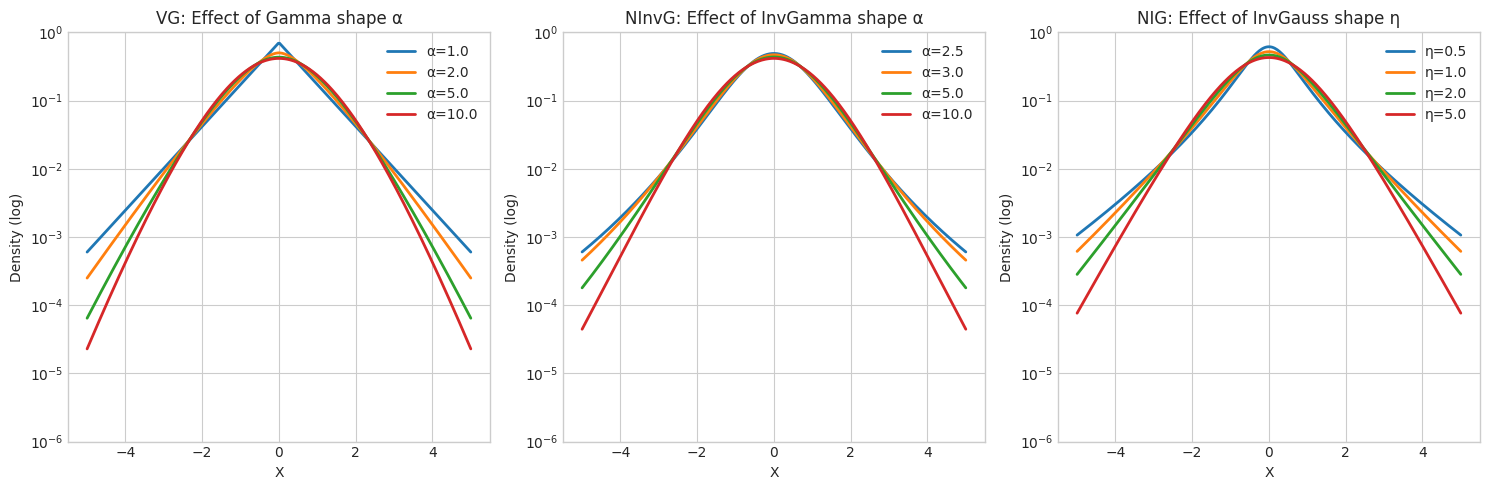

In [10]:
# Show how mixing distribution shape affects tails
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
x_range = np.linspace(-5, 5, 300)

# VG: vary α (shape of Gamma mixing)
ax = axes[0]
for alpha in [1.0, 2.0, 5.0, 10.0]:
    vg = VarianceGamma.from_classical_params(
        mu=np.array([0.0]), gamma=np.array([0.0]), sigma=np.array([[1.0]]),
        shape=alpha, rate=alpha  # Keep E[Y]=1 constant
    )
    pdf = vg.pdf(x_range.reshape(-1, 1)).flatten()
    ax.semilogy(x_range, pdf, linewidth=2, label=f'α={alpha}')
ax.set_xlabel('X')
ax.set_ylabel('Density (log)')
ax.set_title('VG: Effect of Gamma shape α')
ax.legend()
ax.set_ylim(1e-6, 1)

# NInvG: vary α (shape of InvGamma mixing)
ax = axes[1]
for alpha in [2.5, 3.0, 5.0, 10.0]:
    ninvg = NormalInverseGamma.from_classical_params(
        mu=np.array([0.0]), gamma=np.array([0.0]), sigma=np.array([[1.0]]),
        shape=alpha, rate=alpha-1  # Keep E[Y]=1 constant (for α>1)
    )
    pdf = ninvg.pdf(x_range.reshape(-1, 1)).flatten()
    ax.semilogy(x_range, pdf, linewidth=2, label=f'α={alpha}')
ax.set_xlabel('X')
ax.set_ylabel('Density (log)')
ax.set_title('NInvG: Effect of InvGamma shape α')
ax.legend()
ax.set_ylim(1e-6, 1)

# NIG: vary η (shape of InvGaussian mixing)
ax = axes[2]
for eta in [0.5, 1.0, 2.0, 5.0]:
    nig = NormalInverseGaussian.from_classical_params(
        mu=np.array([0.0]), gamma=np.array([0.0]), sigma=np.array([[1.0]]),
        delta=1.0, eta=eta
    )
    pdf = nig.pdf(x_range.reshape(-1, 1)).flatten()
    ax.semilogy(x_range, pdf, linewidth=2, label=f'η={eta}')
ax.set_xlabel('X')
ax.set_ylabel('Density (log)')
ax.set_title('NIG: Effect of InvGauss shape η')
ax.legend()
ax.set_ylim(1e-6, 1)

plt.tight_layout()
plt.show()

## 6. Summary Table

In [11]:
print("\n" + "="*80)
print("SUMMARY: Normal Variance-Mean Mixture Distributions")
print("="*80)

summary = """
╔══════════════════════╦══════════════════════╦══════════════════════════════╗
║ Distribution         ║ Mixing Y             ║ Key Characteristics          ║
╠══════════════════════╬══════════════════════╬══════════════════════════════╣
║ Variance Gamma       ║ Gamma(α, β)          ║ • Semi-heavy tails           ║
║                      ║                      ║ • Flexible kurtosis          ║
║                      ║                      ║ • Popular in finance         ║
╠══════════════════════╬══════════════════════╬══════════════════════════════╣
║ Normal Inverse Gamma ║ InvGamma(α, β)       ║ • Heavy tails (Student-t)    ║
║                      ║                      ║ • Requires α > 2 for var     ║
║                      ║                      ║ • Good for outlier-prone     ║
╠══════════════════════╬══════════════════════╬══════════════════════════════╣
║ Normal Inverse       ║ InvGauss(δ, η)       ║ • Semi-heavy tails           ║
║ Gaussian             ║                      ║ • Special case of GH (p=-½)  ║
║                      ║                      ║ • Good fit for asset returns ║
╚══════════════════════╩══════════════════════╩══════════════════════════════╝

Common Properties:
• All are normal variance-mean mixtures: X|Y ~ N(μ + γY, ΣY)
• Joint distribution (X,Y) is exponential family → closed-form MLE
• Marginal distribution f(x) is NOT exponential family → requires EM
• Skewness controlled by γ (γ=0 → symmetric)
• All have heavier tails than Normal distribution
"""

print(summary)


SUMMARY: Normal Variance-Mean Mixture Distributions

╔══════════════════════╦══════════════════════╦══════════════════════════════╗
║ Distribution         ║ Mixing Y             ║ Key Characteristics          ║
╠══════════════════════╬══════════════════════╬══════════════════════════════╣
║ Variance Gamma       ║ Gamma(α, β)          ║ • Semi-heavy tails           ║
║                      ║                      ║ • Flexible kurtosis          ║
║                      ║                      ║ • Popular in finance         ║
╠══════════════════════╬══════════════════════╬══════════════════════════════╣
║ Normal Inverse Gamma ║ InvGamma(α, β)       ║ • Heavy tails (Student-t)    ║
║                      ║                      ║ • Requires α > 2 for var     ║
║                      ║                      ║ • Good for outlier-prone     ║
╠══════════════════════╬══════════════════════╬══════════════════════════════╣
║ Normal Inverse       ║ InvGauss(δ, η)       ║ • Semi-heavy tails           

---
## 6. Generalized Hyperbolic: The Unifying Distribution

The Generalized Hyperbolic (GH) distribution is the **most general** normal variance-mean mixture.
All other distributions are special cases:

| Special Case | GIG Parameters | Condition |
|-------------|---------------|----------|
| Variance Gamma | $b \to 0$, $p > 0$ | Gamma mixing |
| Normal-Inverse Gaussian | $p = -1/2$ | IG mixing |
| Normal-Inverse Gamma | $a \to 0$, $p < 0$ | InvGamma mixing |

In [12]:
# Create a general GH distribution
gh = GeneralizedHyperbolic.from_classical_params(
    mu=np.array([0.0]),
    gamma=np.array([0.5]),
    sigma=np.array([[1.0]]),
    p=1.0,
    a=1.0,
    b=1.0
)

print("Generalized Hyperbolic distribution created.")
print(f"Mean: {gh.mean()[0]:.4f}")
print(f"Variance: {gh.var()[0]:.4f}")

Generalized Hyperbolic distribution created.
Mean: 1.3497
Variance: 3.8272


### 6.1 Verifying Special Cases

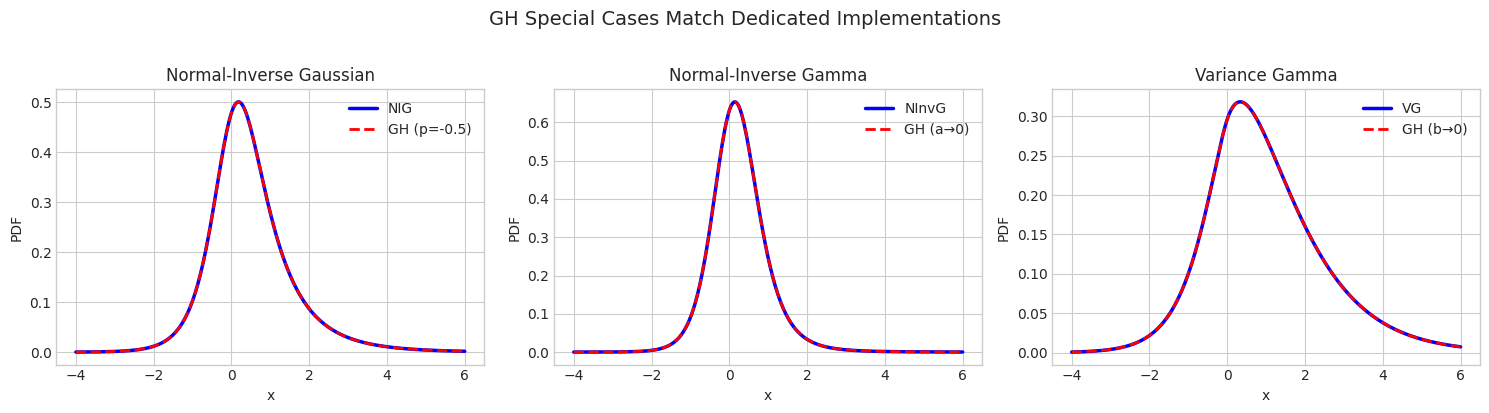

In [13]:
# Test parameters
mu = np.array([0.0])
gamma = np.array([0.5])
sigma = np.array([[1.0]])

x = np.linspace(-4, 6, 300)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# NIG comparison
ax = axes[0]
nig_params = {'delta': 1.0, 'eta': 1.0}
nig = NormalInverseGaussian.from_classical_params(mu=mu, gamma=gamma, sigma=sigma, **nig_params)
gh_nig = GeneralizedHyperbolic.as_normal_inverse_gaussian(mu=mu, gamma=gamma, sigma=sigma, **nig_params)

nig_pdf = nig.pdf(x.reshape(-1, 1)).flatten()
gh_nig_pdf = np.array([gh_nig.pdf(np.array([xi])) for xi in x])

ax.plot(x, nig_pdf, 'b-', linewidth=2.5, label='NIG')
ax.plot(x, gh_nig_pdf, 'r--', linewidth=2, label='GH (p=-0.5)')
ax.set_title('Normal-Inverse Gaussian', fontsize=12)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.legend()

# NInvG comparison
ax = axes[1]
ninvg_params = {'shape': 3.0, 'rate': 1.0}
ninvg = NormalInverseGamma.from_classical_params(mu=mu, gamma=gamma, sigma=sigma, **ninvg_params)
gh_ninvg = GeneralizedHyperbolic.as_normal_inverse_gamma(mu=mu, gamma=gamma, sigma=sigma, **ninvg_params)

ninvg_pdf = ninvg.pdf(x.reshape(-1, 1)).flatten()
gh_ninvg_pdf = np.array([gh_ninvg.pdf(np.array([xi])) for xi in x])

ax.plot(x, ninvg_pdf, 'b-', linewidth=2.5, label='NInvG')
ax.plot(x, gh_ninvg_pdf, 'r--', linewidth=2, label='GH (a→0)')
ax.set_title('Normal-Inverse Gamma', fontsize=12)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.legend()

# VG comparison
ax = axes[2]
vg_params = {'shape': 2.0, 'rate': 1.0}
vg = VarianceGamma.from_classical_params(mu=mu, gamma=gamma, sigma=sigma, **vg_params)
gh_vg = GeneralizedHyperbolic.as_variance_gamma(mu=mu, gamma=gamma, sigma=sigma, **vg_params)

vg_pdf = vg.pdf(x.reshape(-1, 1)).flatten()
gh_vg_pdf = np.array([gh_vg.pdf(np.array([xi])) for xi in x])

ax.plot(x, vg_pdf, 'b-', linewidth=2.5, label='VG')
ax.plot(x, gh_vg_pdf, 'r--', linewidth=2, label='GH (b→0)')
ax.set_title('Variance Gamma', fontsize=12)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.legend()

plt.suptitle('GH Special Cases Match Dedicated Implementations', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [14]:
# Quantitative comparison of means
print("=" * 60)
print("Mean Comparison: GH Special Cases vs Dedicated Implementations")
print("=" * 60)
print(f"\nNIG:   NIG mean = {nig.mean()[0]:.6f}, GH(p=-0.5) mean = {gh_nig.mean()[0]:.6f}")
print(f"NInvG: NInvG mean = {ninvg.mean()[0]:.6f}, GH(a→0) mean = {gh_ninvg.mean()[0]:.6f}")
print(f"VG:    VG mean = {vg.mean()[0]:.6f}, GH(b→0) mean = {gh_vg.mean()[0]:.6f}")

Mean Comparison: GH Special Cases vs Dedicated Implementations

NIG:   NIG mean = 0.500000, GH(p=-0.5) mean = 0.500000
NInvG: NInvG mean = 0.250000, GH(a→0) mean = 0.250000
VG:    VG mean = 1.000000, GH(b→0) mean = 1.000000


### 6.2 Effect of GIG Parameters

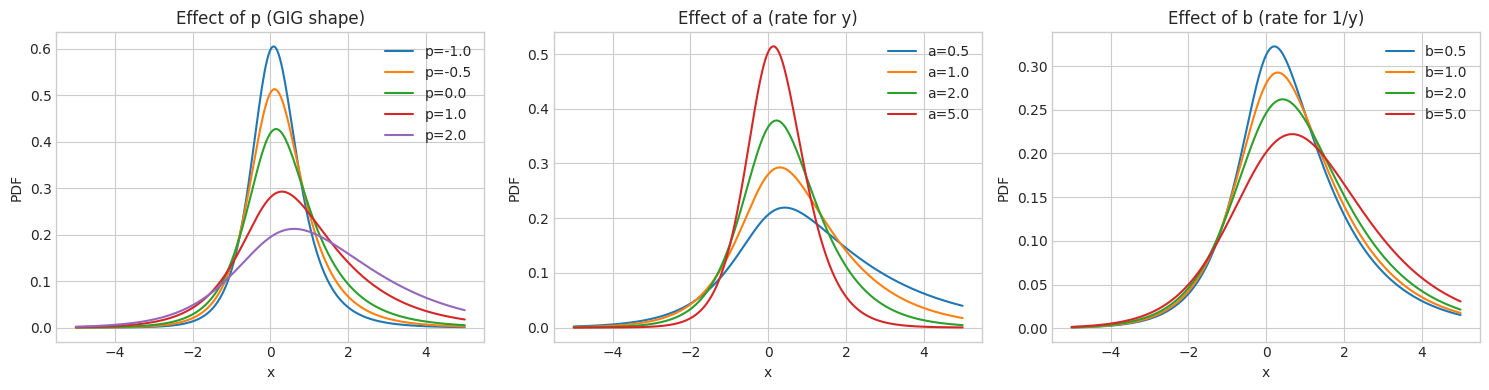

In [15]:
# Effect of GIG parameters on GH distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

x = np.linspace(-5, 5, 300)
base_mu = np.array([0.0])
base_gamma = np.array([0.3])
base_sigma = np.array([[1.0]])

# Effect of p
ax = axes[0]
for p in [-1.0, -0.5, 0.0, 1.0, 2.0]:
    try:
        gh = GeneralizedHyperbolic.from_classical_params(
            mu=base_mu, gamma=base_gamma, sigma=base_sigma, p=p, a=1.0, b=1.0
        )
        pdf = np.array([gh.pdf(np.array([xi])) for xi in x])
        ax.plot(x, pdf, label=f'p={p}')
    except:
        pass
ax.set_title('Effect of p (GIG shape)', fontsize=12)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.legend()

# Effect of a
ax = axes[1]
for a in [0.5, 1.0, 2.0, 5.0]:
    try:
        gh = GeneralizedHyperbolic.from_classical_params(
            mu=base_mu, gamma=base_gamma, sigma=base_sigma, p=1.0, a=a, b=1.0
        )
        pdf = np.array([gh.pdf(np.array([xi])) for xi in x])
        ax.plot(x, pdf, label=f'a={a}')
    except:
        pass
ax.set_title('Effect of a (rate for y)', fontsize=12)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.legend()

# Effect of b
ax = axes[2]
for b in [0.5, 1.0, 2.0, 5.0]:
    try:
        gh = GeneralizedHyperbolic.from_classical_params(
            mu=base_mu, gamma=base_gamma, sigma=base_sigma, p=1.0, a=1.0, b=b
        )
        pdf = np.array([gh.pdf(np.array([xi])) for xi in x])
        ax.plot(x, pdf, label=f'b={b}')
    except:
        pass
ax.set_title('Effect of b (rate for 1/y)', fontsize=12)
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.legend()

plt.tight_layout()
plt.show()

---
## Summary

1. **All distributions** in this family are normal variance-mean mixtures
2. **NInvG** has the heaviest tails (similar to Student-t)
3. **VG** and **NIG** have semi-heavy tails
4. **Skewness** is controlled by the $\gamma$ parameter
5. **GH** is the most general form, unifying all special cases